# Split patchlets 

 * loads the dataframe with the patchlets descriptions
 * splits the eopatches and corresponding patchlets into folds
 * updates the info csv file with fold information
 
 ### Note: is important to delete all fold_{idx} directories before running this script.

In [1]:
import os 
print(os.getcwd())

from functools import partial

import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches

from fd.utils import multiprocess, prepare_filesystem
from fd.training import SplitConfig, fold_split

/data/lscalambrin/proyecto_integrador/segmentation


# Config

In [2]:
save_patchlet_npz = '/data/lscalambrin/proyecto_integrador/segmentation/pergamino/patchlets_npz'
df_path = '/data/lscalambrin/proyecto_integrador/segmentation/pergamino/patchlet-info.csv'

split_config = SplitConfig(
    bucket_name='bucket-name',
    aws_access_key_id='',
    aws_secret_access_key='',
    aws_region='eu-central-1',
    metadata_path=df_path,
    npz_folder=save_patchlet_npz,
    n_folds=2)

### Load patchlets metadata 

In [3]:
df = pd.read_csv(open(split_config.metadata_path))

### Create n-fold datasets

In [42]:
eops = df.eopatch.unique()

fold = [1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2]
labels = ['Train', 'Train', 'Train', 'Train', 'Train', 'Train', 'Train', 'Train', 'Test', 
        'Train', 'Train','Test', 'Train', 'Test', 'Train', 'Train', 'Train', 'Train', 'Train', 
        'Train', 'Train', 'Train', 'Train', 'Train', 'Test', 'Train', 'Test']

eopatch_to_fold_map = dict(zip(eops, fold))
eopatch_to_legend_map = dict(zip(eops, labels))

df['fold'] = df['eopatch'].apply(lambda x: eopatch_to_fold_map[x])

In [43]:
print(f'fold -> {fold}')
print(f'eops_names -> {eops}')

fold -> [1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2]
eops_names -> ['eopatch_15' 'eopatch_13' 'eopatch_7' 'eopatch_25' 'eopatch_5'
 'eopatch_2' 'eopatch_18' 'eopatch_17' 'eopatch_11' 'eopatch_1'
 'eopatch_10' 'eopatch_31' 'eopatch_9' 'eopatch_0' 'eopatch_26'
 'eopatch_3' 'eopatch_14' 'eopatch_23' 'eopatch_20' 'eopatch_30'
 'eopatch_29' 'eopatch_16' 'eopatch_8' 'eopatch_12' 'eopatch_19'
 'eopatch_6' 'eopatch_24']


In [44]:
for nf in range(split_config.n_folds):
    print(f'{len(df[df.fold==nf+1])} patchlets in fold {nf+1}')

4543 patchlets in fold 1
1127 patchlets in fold 2


Visualise on grid definition

In [45]:
path = '/home/lscalambrin/proyecto_integrador/segmentation'
gdf = gpd.read_file(path+'/grid_eop.gpkg')
gdf

/home/lscalambrin/miniconda3/envs/deep_crop/lib/python3.8/site-packages/geopandas/geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


,name,geometry
0,eopatch_0,"POLYGON ((689803.978 6239121.645, 689803.978 6..."
1,eopatch_1,"POLYGON ((689803.978 6251016.769, 689803.978 6..."
2,eopatch_2,"POLYGON ((689803.978 6262911.893, 689803.978 6..."
3,eopatch_3,"POLYGON ((689803.978 6274807.017, 689803.978 6..."
4,eopatch_4,"POLYGON ((702429.972 6215331.398, 702429.972 6..."
5,eopatch_5,"POLYGON ((702429.972 6227226.521, 702429.972 6..."
6,eopatch_6,"POLYGON ((702429.972 6239121.645, 702429.972 6..."
7,eopatch_7,"POLYGON ((702429.972 6251016.769, 702429.972 6..."
8,eopatch_8,"POLYGON ((702429.972 6262911.893, 702429.972 6..."
9,eopatch_9,"POLYGON ((702429.972 6274807.017, 702429.972 6..."


In [46]:
len(eops), len(gdf)

(27, 32)

In [47]:
gdf_training = gdf[gdf['name'].isin(eops)]

In [48]:
gdf_training

,name,geometry
0,eopatch_0,"POLYGON ((689803.978 6239121.645, 689803.978 6..."
1,eopatch_1,"POLYGON ((689803.978 6251016.769, 689803.978 6..."
2,eopatch_2,"POLYGON ((689803.978 6262911.893, 689803.978 6..."
3,eopatch_3,"POLYGON ((689803.978 6274807.017, 689803.978 6..."
5,eopatch_5,"POLYGON ((702429.972 6227226.521, 702429.972 6..."
6,eopatch_6,"POLYGON ((702429.972 6239121.645, 702429.972 6..."
7,eopatch_7,"POLYGON ((702429.972 6251016.769, 702429.972 6..."
8,eopatch_8,"POLYGON ((702429.972 6262911.893, 702429.972 6..."
9,eopatch_9,"POLYGON ((702429.972 6274807.017, 702429.972 6..."
10,eopatch_10,"POLYGON ((715055.967 6215331.398, 715055.967 6..."


In [50]:
gdf_training['fold'] = gdf_training.name.apply(lambda x: eopatch_to_fold_map[x])
gdf_training['legend'] = gdf_training.name.apply(lambda x: eopatch_to_legend_map[x])

/home/lscalambrin/miniconda3/envs/deep_crop/lib/python3.8/site-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [51]:
gdf_training

,name,geometry,fold,legend
0,eopatch_0,"POLYGON ((689803.978 6239121.645, 689803.978 6...",2,Test
1,eopatch_1,"POLYGON ((689803.978 6251016.769, 689803.978 6...",1,Train
2,eopatch_2,"POLYGON ((689803.978 6262911.893, 689803.978 6...",1,Train
3,eopatch_3,"POLYGON ((689803.978 6274807.017, 689803.978 6...",1,Train
5,eopatch_5,"POLYGON ((702429.972 6227226.521, 702429.972 6...",1,Train
6,eopatch_6,"POLYGON ((702429.972 6239121.645, 702429.972 6...",1,Train
7,eopatch_7,"POLYGON ((702429.972 6251016.769, 702429.972 6...",1,Train
8,eopatch_8,"POLYGON ((702429.972 6262911.893, 702429.972 6...",1,Train
9,eopatch_9,"POLYGON ((702429.972 6274807.017, 702429.972 6...",1,Train
10,eopatch_10,"POLYGON ((715055.967 6215331.398, 715055.967 6...",1,Train


(686016.1799736198, 769347.7414305198, 6211762.860541333, 6290270.677594274)

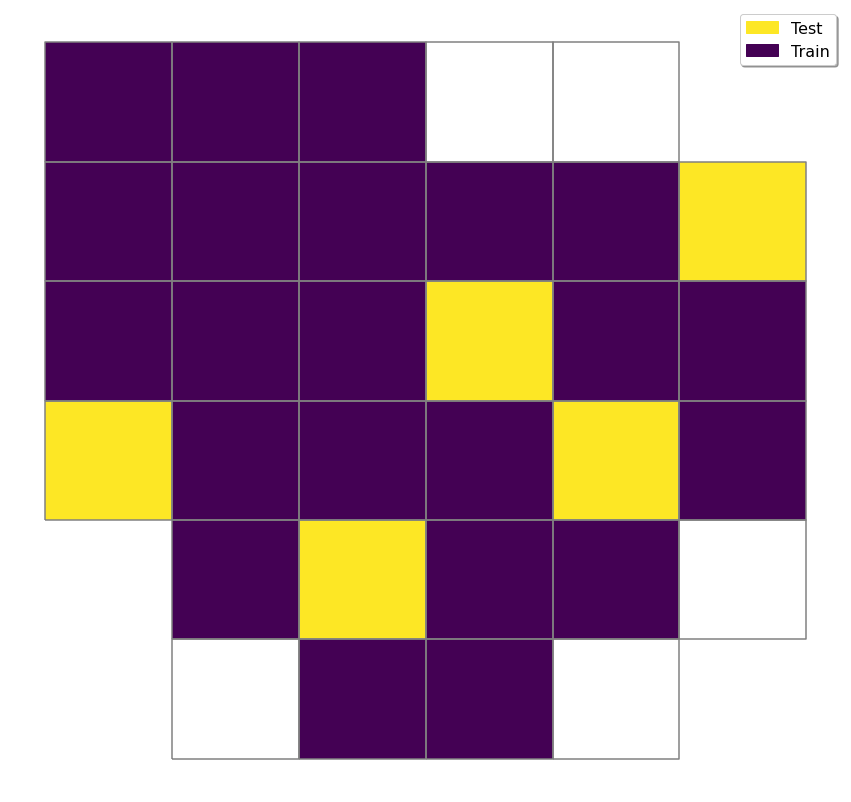

In [164]:
fig, ax = plt.subplots(figsize=(15, 15))

# pointsPalette = {'Train': 'chartreuse',
#                  'Test': 'darkgreen', 'Not used': 'white'}
pointsPalette = {'Train': '#440154',
                 'Test': '#fde725', 'Not used': 'white'}

lineWidths = {'M': .5, 'S': 2, 'C': 2, 'Unknown': .5}
legend_patch = []
gdf.boundary.plot(ax=ax, color = 'grey')
# gdf_training.plot(ax=ax, column='fold', legend=True,k=2)

for ctype, data in gdf_training.groupby('legend'):
    color = pointsPalette[ctype]
    label = ctype
    data.plot(color=color,
              label=ctype,
              ax = ax)
    legend_patch.append(mpatches.Patch(color=color, label=label))
# legend_patch.append(mpatches.Patch(color=pointsPalette['Not used'], label='Not used'))
ax.legend(handles=legend_patch,fontsize=16,shadow=True)
plt.axis('off')

## Create fold directories and npz files

The previously generated `.npz` files are split into folds according to the fold assigned in the dataframe. New `fold_X` folders are created where the new files are saved to.

In [24]:
partial_fn = partial(fold_split, df=df, config=split_config)

In [25]:
npz_files = os.listdir(split_config.npz_folder)

Remove possible folders from list

In [26]:
npz_files = [npzf for npzf in npz_files if npzf.startswith('patchlets_')]

In [27]:
_ = multiprocess(partial_fn, npz_files, max_workers=20)

  0%|          | 0/114 [00:00<?, ?it/s]

Update `.csv` file with fold information

In [28]:
with open(split_config.metadata_path, 'w') as fcsv:
    df.to_csv(fcsv, index=False)

In [29]:
df.head()

,chunk,eopatch,patchlet,chunk_pos,timestamp,mean_b0,mean_b1,mean_b2,mean_b3,std_b0,...,norm_meanstd_mean_b3,norm_meanstd_median_b0,norm_meanstd_median_b1,norm_meanstd_median_b2,norm_meanstd_median_b3,norm_meanstd_std_b0,norm_meanstd_std_b1,norm_meanstd_std_b2,norm_meanstd_std_b3,fold
0,patchlets_field_delineation_0.npz,eopatch_15,/data/lscalambrin/proyecto_integrador/segmenta...,0,2017-09-19 14:00:39,984.051117,978.877121,795.614120,2965.187881,127.634471,...,2580.253190,1061.084337,1029.779116,1009.517068,2362.062249,151.959767,151.973556,353.938057,798.169624,1
1,patchlets_field_delineation_0.npz,eopatch_15,/data/lscalambrin/proyecto_integrador/segmenta...,1,2017-10-14 14:00:51,980.257767,955.877960,821.442291,2913.502213,158.518532,...,2507.773368,1040.004016,1001.098896,973.501506,2317.145582,164.198739,167.666855,358.093192,718.156053,1
2,patchlets_field_delineation_0.npz,eopatch_15,/data/lscalambrin/proyecto_integrador/segmenta...,2,2017-11-23 14:00:51,1194.272278,1180.621323,1281.253357,2529.552444,121.712857,...,2412.995882,1217.033568,1181.133803,1383.229343,2351.761737,129.689098,145.226534,301.447610,382.269817,1
3,patchlets_field_delineation_0.npz,eopatch_15,/data/lscalambrin/proyecto_integrador/segmenta...,3,2017-11-28 14:00:39,1234.066360,1236.255508,1407.580154,2644.202423,126.912937,...,2412.995882,1217.033568,1181.133803,1383.229343,2351.761737,129.689098,145.226534,301.447610,382.269817,1
4,patchlets_field_delineation_0.npz,eopatch_15,/data/lscalambrin/proyecto_integrador/segmenta...,4,2017-12-18 14:00:39,1239.368698,1301.700485,1495.377548,2799.950409,198.149501,...,2675.040616,1072.103163,1066.453815,1039.613956,2634.069026,170.641841,207.365838,421.924147,455.153152,1


#### Check results with some sanity checks 
- Not every fold directory has every ".npz" file


In [32]:
data_fold = []
for fold in range(1, split_config.n_folds+1):
    total = 0
    print(f'--------------- fold: {fold}')
    
    fold_folder = os.path.join(split_config.npz_folder, f'fold_{fold}')

    for chunk in os.listdir(fold_folder):

        data = np.load(open(os.path.join(fold_folder, chunk),'rb'), allow_pickle=True)

        fold_df = df[(df.chunk == chunk) & (df.fold == fold)]
        total += data['y_boundary'].shape[0]
        print(data['y_boundary'].shape[0])
        assert len(fold_df.chunk_pos) == data['y_boundary'].shape[0]
        assert len(fold_df.chunk_pos) == data['y_extent'].shape[0]
        assert len(fold_df.chunk_pos) == data['y_distance'].shape[0]
        assert len(fold_df.chunk_pos) == data['X'].shape[0]
        
        print(f"For fold_{fold}/{chunk} the lengths match.")
    data_fold.append(total)
print(f'total: {sum(data_fold)}')

--------------- fold: 1
37
For fold_1/patchlets_field_delineation_81.npz the lengths match.
50
For fold_1/patchlets_field_delineation_58.npz the lengths match.
50
For fold_1/patchlets_field_delineation_89.npz the lengths match.
50
For fold_1/patchlets_field_delineation_90.npz the lengths match.
50
For fold_1/patchlets_field_delineation_38.npz the lengths match.
45
For fold_1/patchlets_field_delineation_20.npz the lengths match.
50
For fold_1/patchlets_field_delineation_7.npz the lengths match.
50
For fold_1/patchlets_field_delineation_80.npz the lengths match.
50
For fold_1/patchlets_field_delineation_27.npz the lengths match.
39
For fold_1/patchlets_field_delineation_10.npz the lengths match.
39
For fold_1/patchlets_field_delineation_59.npz the lengths match.
50
For fold_1/patchlets_field_delineation_94.npz the lengths match.
39
For fold_1/patchlets_field_delineation_60.npz the lengths match.
20
For fold_1/patchlets_field_delineation_113.npz the lengths match.
39
For fold_1/patchlets_

In [33]:
data_fold

[4731, 939]